# **Chapter 6. Numpy 함수 심화 - 2**

   - Numpy를 활용하여 여러 연산과 병합을 알아보았습니다.
   - 이제부터는 Numpy 배열간의 사칙연산에 쓰이는 강력한 기능인 Broadcasting이라는 것에 대해 알아보겠습니다.
   - 또한, 두 배열 간의 비교 연산, 배열의 읽기와 쓰기를 알아보겠습니다.

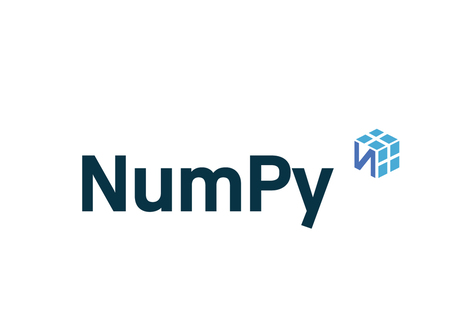

### 1. 배열 간의 사칙연산

배열 간의 연산은 기본적으로 같은 요소  간(elememt-wise)에 이루어집니다. 예를 들어 [1, 2, 3] + [2, 3, 1]의 연산을 하면,
[3, 5, 4]라는 배열이 결과값으로 나오게 됩니다. 따라서 기본적으로 같은 형태의 배열끼리 연산하는 것이 기본입니다.

하지만 형태가 다르더라도 연산할 수 있도록 하는 기능이 있는데, 이를 **브로드캐스팅(Broadcasting)** 이라고 합니다.  

브로드캐스팅이라는 연산이 배열 간의 사칙 연산에서는 자주 활용됩니다. 먼저 아래 그림을 통해 어떤 연산인지 확인해보겠습니다.

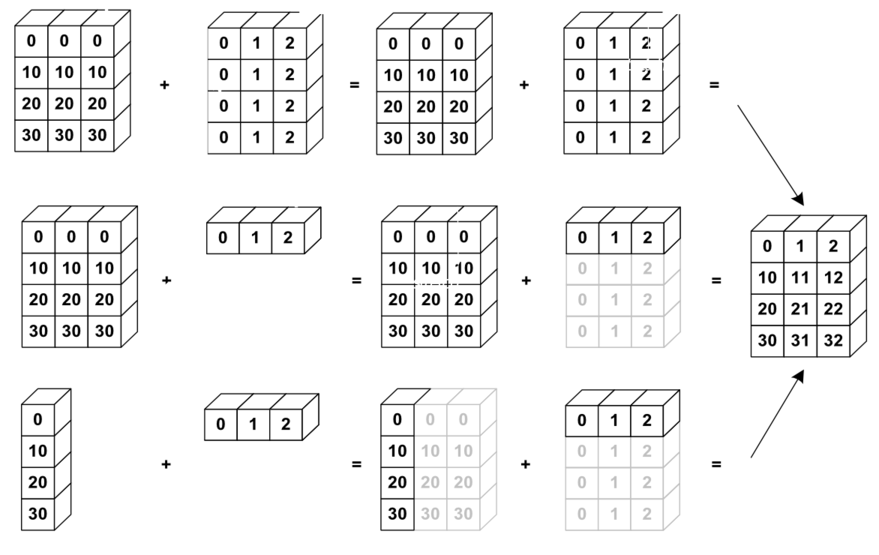

> 위 그림을 보면, 최종적으로 구해지는 배열값은 동일하지만, 가운데줄과 가장 아랫줄의 연산은 자동으로 부족한 공간을 채워넣어 연산을 해주는 것을 볼 수 있습니다. </br></br>
 사람이 하나하나 형태를 맞춰주지 않아도 자동으로 해주어 매우 편리합니다. 이제부터 이를 활용한 연산을 해보겠습니다.

In [1]:
# 예제 1 : 두 배열의 사칙연산 해보기
import numpy as np

arr_1 = np.array([[1,2,3], [1,2,3]])
arr_2 = np.array([[1,1,1], [2,2,2]])
print("- 두 배열의 생성 -")
print("배열 1:\n", arr_1)
print("배열 2:\n", arr_2)

# 배열 간 사칙연산
print("배열 간 더하기:\n", arr_1 + arr_2) 
print("배열 간 빼기:\n", arr_1 - arr_2) 
print("배열 간 곱하기:\n", arr_1 * arr_2)  
print("배열 간 나누기:\n", arr_1 / arr_2) 

- 두 배열의 생성 -
배열 1:
 [[1 2 3]
 [1 2 3]]
배열 2:
 [[1 1 1]
 [2 2 2]]
배열 간 더하기:
 [[2 3 4]
 [3 4 5]]
배열 간 빼기:
 [[ 0  1  2]
 [-1  0  1]]
배열 간 곱하기:
 [[1 2 3]
 [2 4 6]]
배열 간 나누기:
 [[1.  2.  3. ]
 [0.5 1.  1.5]]


> 배열과 숫자 사이의 브로드캐스팅 연산을 해보겠습니다. </br>배열에 숫자를 곱해주면, 숫자는 각 배열의 요소 모두에 작용되는 것을 확인할 수 있습니다.

In [2]:
# 예제 2 : 브로드캐스팅을 활용하여 배열과 숫자 사이의 사칙연산을 해보기

arr = np.array([[1,2,3], [4,5,6]])
number = 3

# 배열 + 숫자 
print("배열 - number 덧셈\n", arr + number)  # 3 하나로 이루어진 number를 자동으로 broadcasting 되어, 3으로 채워진 2*3 2차원 배열과 더한 것처럼 연산해줍니다. 

# 배열 - 숫자 
print("배열 - number 빼기\n", arr - number)

# 배열 * 숫자 
print("배열 * number 곱하기\n", arr * number)

# 배열 / 숫자 
print("배열 / number 나누기\n", arr / number)

배열 - number 덧셈
 [[4 5 6]
 [7 8 9]]
배열 - number 빼기
 [[-2 -1  0]
 [ 1  2  3]]
배열 * number 곱하기
 [[ 3  6  9]
 [12 15 18]]
배열 / number 나누기
 [[0.33333333 0.66666667 1.        ]
 [1.33333333 1.66666667 2.        ]]


> 위 그림의 예시와 같이 두 배열 간의 브로드 캐스팅 연산을 해보겠습니다. 두 배열은 그림의 예시와 동일하게 다음과 같이 정의합니다.

    arr_1 = np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]])
    arr_2 = np.array([[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]])
    arr_3 = np.array([[0, 10, 20, 30]]).T
    arr_4 = np.array([[0, 1, 2]])

In [3]:
# 예제 3 : 브로드캐스팅을 활용하여 배열과 배열 사이의 사칙연산을 해보기

arr_1 = np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]])
arr_2 = np.array([[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]])
arr_3 = np.array([[0, 10, 20, 30]]).T # (4, 1)의 형태를 해주어야 합니다. 즉 행과 열을 바꿔주어야 합니다.(앞에서 배운 .T를 사용합니다.) 
arr_4 = np.array([[0, 1, 2]])

print("배열 1:\n", arr_1)
print("배열 2:\n", arr_2)
print("배열 3:\n", arr_3)
print("배열 4:\n", arr_4)

# 배열 1과 2 연산
print("배열 1과 2 더하기\n", arr_1 + arr_2)

# 배열 1과 4 연산
print("배열 2과 2 더하기\n", arr_1 + arr_4)

# 배열 3과 4 연산
print("배열 3과 4 더하기\n", arr_3 + arr_4)

배열 1:
 [[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]]
배열 2:
 [[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]
배열 3:
 [[ 0]
 [10]
 [20]
 [30]]
배열 4:
 [[0 1 2]]
배열 1과 2 더하기
 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]
배열 2과 2 더하기
 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]
배열 3과 4 더하기
 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


#### 여기서 잠깐!
> 위의 배열 중 arr_3은 Transpose연산인 .T를 해준 것을 확인할 수 있습니다. Transpose 연산을 하게 되면 (1, 4) 형태의 배열이 (4, 1) 형태로 바뀌게 됩니다. Transpose를 하는 이유는, </br> (4, 1) 과 (1, 3) 형태 사이의 연산은, (4, 1)의 2번째 축과 (1, 3)의 1번째 축을 자동으로 연산하여 최종적으로 (4, 3)으로 만들어줄 수 있지만, </br>
(1, 4) 와 (1, 3) 형태 사이의 연산은 1번째 축이 둘 다 1로 되어있기 때문에 브로드캐스팅이 작용될 수 없기 때문입니다.</br>
정리하자면, 두 배열 모두 브로드캐스팅 연산이 되기 위해서는 자동으로 연산되어지는 축이 서로 다른 축에서 1이어야 합니다. </br></br>
아래의 예제를 통해 이를 확인해보겠습니다. 

In [5]:
# 예제 4 : 브로드캐스팅이 되는 경우와 안되는 경우 확인해보기

arr_1 = np.array([[0, 10, 20, 30]]).T # (4, 1) 형태
arr_2 = np.array([[0, 10, 20, 30]])   # (1, 4) 형태
arr_3 = np.array([[0, 1, 2]])         # (1, 3) 형태

print("배열 1:\n", arr_1)
print("배열 2:\n", arr_2)
print("배열 3:\n", arr_3)

# 배열 1과 3 연산
print("\n배열 1과 2의 형태는 다음과 같습니다.\n", "배열 1번: ", arr_1.shape, "배열 3번: ", arr_3.shape)
print("배열 1과 2 더하기\n", arr_1 + arr_3)

# 배열 2과 3 연산
print("\n배열 2과 3의 형태는 다음과 같습니다.\n", "배열 2번: ", arr_2.shape, "배열 3번: ", arr_3.shape)
print("배열 2과 3 더하기\n", arr_2 + arr_3) # 에러가 나는 것을 확인할 수 있다

배열 1:
 [[ 0]
 [10]
 [20]
 [30]]
배열 2:
 [[ 0 10 20 30]]
배열 3:
 [[0 1 2]]

배열 1과 2의 형태는 다음과 같습니다.
 배열 1번:  (4, 1) 배열 3번:  (1, 3)
배열 1과 2 더하기
 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]

배열 2과 3의 형태는 다음과 같습니다.
 배열 2번:  (1, 4) 배열 3번:  (1, 3)


No matching template
---------------------------------------------------------------------------
오류도우미의 설명



ValueError: operands could not be broadcast together with shapes (1,4) (1,3) 

> 파이썬에서는 사칙연산 외에 나누기의 몫과 나머지를 구해주는 연산이 있습니다.   
이는 배열의 연산에도 활용될 수 있습니다</br>
이 연산 또한 브로드캐스팅이 적용됩니다.

In [6]:
# 예제 5 : 나누기의 몫과 나머지를 구하는 연산


arr = np.array([[4, 8, 12, 16]])
number = 2

# 배열 // number 
print("배열 // number 몫\n", arr // number)

# 배열 ** number
print("배열 ** number 거듭제곱\n", arr ** number)

배열 // number 몫
 [[2 4 6 8]]
배열 ** number 거듭제곱
 [[ 16  64 144 256]]


> 리스트를 입력받아 사칙연산을 수행해보기

In [9]:
# 예제 6 : 리스트를 입력받아 사칙연산 수행하기

input_data = list(map(int, input("5개의 크기의 list를 입력해주세요!\n").split()))
arr = np.array(input_data)
number = int(input("사칙 연산을 수행할 수를 입력해주세요!\n"))

# 더하기
print("덧셈\n", arr + number)

# 빼기
print("빼기\n", arr - number)

# 곱하기
print("배열 * number 곱하기\n", arr * number)

# 나누기
print("배열 / number 나누기\n", arr / number)

# 몫
print("배열 // number 몫\n", arr // number)

# 거듭제곱
print("배열 ** number 거듭제곱\n", arr ** number)


5개의 크기의 list를 입력해주세요!
 1 2 3 4 5
사칙 연산을 수행할 수를 입력해주세요!
 3


덧셈
 [4 5 6 7 8]
빼기
 [-2 -1  0  1  2]
배열 * number 곱하기
 [ 3  6  9 12 15]
배열 / number 나누기
 [0.33333333 0.66666667 1.         1.33333333 1.66666667]
배열 // number 몫
 [0 0 1 1 1]
배열 ** number 거듭제곱
 [  1   8  27  64 125]


### 2. Numpy 배열 간의 비교 연산
> Numpy는 배열 간의 비교 연산도 할 수 있습니다. 비교 연산의 결과는 불리언(boolean) 데이터 타입인 False, True로 결과값을 줍니다.</br>

`np.any` 함수는 배열 요소 중 하나라도 True 혹은 0이 아닌 수이면 `True`를 반환합니다.
> 활용 방법 : np.any(arr)

`np.all` 함수는 배열 모든 요소가 True 혹은 0이 아닌 수이면 `True`를 반환합니다.
> 활용 방법 : np.all(arr)

numpy는 `두 배열 간의 비교`도 가능합니다. 이 때는 각 요소별로 비교를 합니다. 예를 들어, a=[1,2]와 b=[1,3]을 a==b로 비교하면 [True, False]를 반환합니다.
> 활용 방법 : arr_1 >= arr_2

In [10]:
# 예제 7 : 배열의 비교 연산 수행하기

arr = np.arange(1, 11)
print("1~10까지로 구성된 배열 생성: ", arr)
print("5 보다 큰 수인지 아닌지 True와 False로 결과값을 주기: ", arr>5)

# any, all
print("5 보다 큰 수가 1개라도 있는지: ", np.any(arr>5))
print("모든 수가 5 보다 큰지: ", np.all(arr>5))
print("모든 수가 -1 보다 큰지: ", np.all(arr>-1))

# 배열 간 비교
print("\n- 두 배열을 비교 -")

arr_1 = np.array([1, 3, 0])
arr_2 = np.array([5, 2, 0])
print("배열 1:\n", arr_1)
print("배열 2:\n", arr_2)

print("배열끼리 각 요소 비교하기(arr_1보다 arr_2가 더 작은 값): ", arr_1 > arr_2)
print("배열끼리 각 요소 비교하기(arr_1와 arr_2가 같은 값): ", arr_1 == arr_2)

1~10까지로 구성된 배열 생성:  [ 1  2  3  4  5  6  7  8  9 10]
5 보다 큰 수인지 아닌지 True와 False로 결과값을 주기:  [False False False False False  True  True  True  True  True]
5 보다 큰 수가 1개라도 있는지:  True
모든 수가 5 보다 큰지:  False
모든 수가 -1 보다 큰지:  True

- 두 배열을 비교 -
배열 1:
 [1 3 0]
배열 2:
 [5 2 0]
배열끼리 각 요소 비교하기(arr_1보다 arr_2가 더 작은 값):  [False  True False]
배열끼리 각 요소 비교하기(arr_1와 arr_2가 같은 값):  [False False  True]


In [ ]:
# 예제 8 : 리스트를 입력받아 비교 연산 수행하기

input_data = list(map(int, input("임의의 개수의 숫자로 list를 입력해주세요!\n").split()))
arr = np.array(input_data)
print("생성된 배열\n: ", arr)

# any, all
print("8 보다 큰 수가 1개라도 있는지: ", np.any(arr>8))
print("모든 수가 -3 보다 큰지: ", np.all(arr>-3))

### 3. Numpy 배열에서 최대값, 최소값 구하기 
Numpy는 배열 요소들의 최대값과 최소값을 구하는 함수를 가지고 있습니다.</br>

`np.max` 함수는 배열 요소의 최대값을 반환합니다.
> 활용 방법 : np.max(arr)

`np.min` 함수는 배열 요소의 최소값을 반환합니다.
> 활용 방법 : np.min(arr)

`np.argmax` 함수는 배열 요소의 최대값이 있는 index를 반환합니다.
> 활용 방법 : np.argmax(arr)

`np.argmin` 함수는 배열 요소의 최소값이 있는 index를 반환합니다.
> 활용 방법 : np.argmin(arr)

In [14]:
# 예제 9 : max, min, argmax, argmin를 활용하기

arr = np.arange(1, 101, 1) # 1~100까지 자연수로 이루어진 배열

print("최대값: ", np.max(arr))
print("최소값: ", np.min(arr))
print("최대값이 있는 index: ", np.argmax(arr))
print("최소값이 있는 index: ", np.argmin(arr))

# argmin, argmax 활용
arr = np.array([2,1,4,6])
index_min = np.argmin(arr)
index_max = np.argmax(arr)

print("최소값의 index를 활용하여 배열의 최소값 출력: ", arr[index_min])
print("최대값의 index를 활용하여 배열의 최대값 출력: ", arr[index_max])

# 리스트를 입력받아 max, min, argmax, argmin를 활용하여 최대, 최소, 각각의 index를 구해보기
input_data = list(map(int, input("임의의 개수의 숫자로 list를 입력해주세요!\n").split()))
arr = np.array(input_data)
print("생성된 배열\n: ", arr)

print("최대값: ", np.max(arr))
print("최소값: ", np.min(arr))
print("최대값이 있는 index: ", np.argmax(arr))
print("최소값이 있는 index: ", np.argmin(arr))

최대값:  100
최소값:  1
최대값이 있는 index:  99
최소값이 있는 index:  0
최소값의 index를 활용하여 배열의 최소값 출력:  1
최대값의 index를 활용하여 배열의 최대값 출력:  6


---------------------------------------------------------------------------
오류도우미의 설명

<<< 이 오류는 왜 일어났을까요?? >>>
유저가 발생시킨 오류입니다.
주피터 랩의 커널 중지 기능을 통해 발생시킬 수 있습니다.

<<< 오류도우미의 추천 해결방법 >>>

임의의 개수의 숫자로 list를 입력해주세요!
 1234


###  4. Numpy 데이터의 읽기 및 쓰기

Numpy는 데이터를 저장하고 읽는 기능을 가지고 있습니다.

`np.load` 함수는 지정한 경로의 배열 파일을 불러옵니다.
> 활용 방법 : np.load(파일 경로)

`np.save` 함수는 지정한 경로에 배열을 저장합니다
> 활용 방법 : np.save(파일 경로, 저장할 배열)

- 배열을 저장할 때 임의의 확장자를 입력하여도 문제가 없이 잘 저장됩니다. 하지만, 일반적으로 .npy라는 확장자를 활용합니다.


In [ ]:
# 예제 10 

# np.save를 활용하여 저장해보기
arr = np.array([1,2,3,4])
file_path = "save_data.npy"
np.save(file_path, arr) # arr배열을 file_path에 저장된 경로에 저장합니다.

# np.load를 활용하여 불러오기
loaded_arr = np.load(file_path) # file_path 경로에 있는 배열을 불러옵니다. 


# 리스트를 입력받아 저장하기
input_data = list(map(int, input("임의의 개수의 숫자로 list를 입력해주세요!\n").split()))
arr = np.array(input_data)

# 저장하기
np.save("save_data.npy", arr)
# 불러오기
loaded_arr = np.load("save_data.npy") 